In [1]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def polyFit(df):
    polynomial = 5
    gradient = 0.05
    df
    return df

In [3]:
def crop_range_to_numpy(df):
    
    # Dropping columns : ['patientID', 'has_DM2']
    df_dropped_index = df.drop(labels=['patientID', 'has_DM2'], axis=1, inplace=False)
    
    # Cropping raman shift from range 800 cm-1 to 1800cm-1
    cropped_signal = df_dropped_index.loc[:, 'Var802':'Var1801']
    
    # Convert data to numpy.ndarray
    cropped_signal_np = cropped_signal.to_numpy()
    
    # Dropping the first index corresponding to label : ramanShift
    cropped_signal_np = cropped_signal_np[1:]
    
    return cropped_signal_np

In [4]:
df_matlab = pd.read_csv('../../raman_spectroscopy/matlab_raman_preprocessed/earData.csv', header=None)

In [5]:
df_matlab

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.109544,0.177142,0.173623,0.177176,0.159734,0.158000,0.184051,0.212126,0.235951,0.257984,...,0.150978,0.140330,0.129085,0.133745,0.144209,0.151986,0.148357,0.137125,0.133958,0.130459
1,0.109258,0.172885,0.214020,0.230669,0.218450,0.203159,0.187297,0.165474,0.153201,0.150318,...,0.109427,0.095534,0.090051,0.095128,0.104937,0.116737,0.121955,0.121972,0.110710,0.105519
2,0.159032,0.193393,0.241094,0.251157,0.235980,0.220931,0.201956,0.177007,0.169146,0.178073,...,0.220392,0.194950,0.141888,0.112889,0.114863,0.150639,0.167150,0.170507,0.177817,0.096202
3,0.109713,0.252363,0.344986,0.393723,0.386904,0.374401,0.362303,0.332895,0.312926,0.309658,...,0.128899,0.133675,0.133446,0.148109,0.158930,0.156108,0.164606,0.179078,0.168005,0.183535
4,0.211333,0.163690,0.204773,0.203962,0.203862,0.201805,0.181100,0.148794,0.129302,0.129738,...,0.221735,0.213258,0.172450,0.180123,0.198990,0.203952,0.196866,0.187679,0.158373,0.143136
5,0.252473,0.188353,0.176637,0.175877,0.203836,0.222344,0.223300,0.225091,0.221946,0.211098,...,0.243996,0.235657,0.228041,0.244239,0.261272,0.266504,0.271040,0.271376,0.243151,0.229599
6,0.114963,0.175076,0.263018,0.293772,0.289066,0.283492,0.269648,0.241222,0.232389,0.234764,...,0.075630,0.077231,0.081783,0.082705,0.095873,0.129907,0.142544,0.144089,0.157100,0.106796
7,0.098379,0.173794,0.200085,0.205887,0.175925,0.147036,0.126315,0.107499,0.104454,0.117525,...,0.062789,0.053242,0.059958,0.063803,0.066287,0.069812,0.077633,0.084982,0.088060,0.117709
8,0.140249,0.226689,0.283303,0.314156,0.312689,0.314318,0.322694,0.318643,0.316330,0.316547,...,0.188111,0.188490,0.189466,0.172862,0.167738,0.192059,0.203983,0.209999,0.232156,0.201431
9,0.121780,0.219225,0.275863,0.294363,0.266279,0.242153,0.226838,0.206323,0.203996,0.218647,...,0.139240,0.108594,0.079041,0.063943,0.068680,0.097074,0.116187,0.126307,0.132221,0.094565


In [6]:
df_original = pd.read_csv('../../raman_spectroscopy/original_raman_spectroscopy/earLobe.csv', header=1)
df_original.drop(['ramanShift', 'NaN'], axis=1, inplace=True)

In [7]:
df_original.loc[0]

0       181.8
1       181.8
2       181.8
3       181.8
4       181.8
        ...  
3155      0.0
3156      0.0
3157      0.0
3158      0.0
3159      0.0
Name: 0, Length: 3160, dtype: float64

In [8]:
polynomial_degree=15 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(df_original.iloc[0])
Imodpoly_output=baseObj.IModPoly(polynomial_degree, gradient=0.05)

In [9]:
print(Imodpoly_output)

[27.88694854 27.48871429 27.09182205 ... -2.02257332 -1.92085564
 -1.32874109]


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler(with_mean=True)
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

In [11]:
df_transformed = scaler.fit_transform(Imodpoly_output[800:1800].reshape(-1, 1))
df_transformed = min_max_scaler.fit_transform(df_transformed)

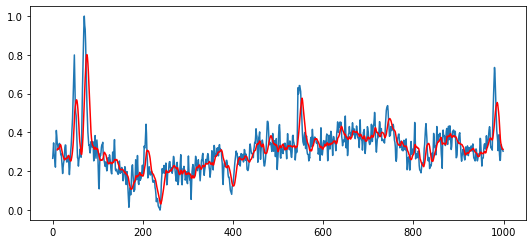

In [12]:
subj = pd.Series(df_transformed.reshape(-1))
rolling = subj.rolling(window=11)
rolling_mean = rolling.mean()
rolling_mean

subj.plot()
rolling_mean.plot(color='red')
plt.show()

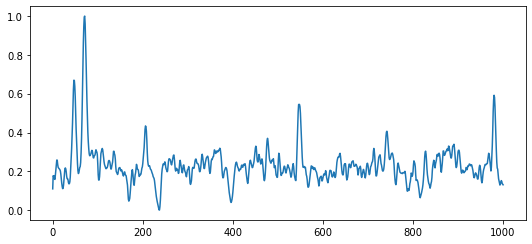

In [60]:
plt.plot(df_matlab.iloc[0])
plt.show()

In [78]:
from pybaselines.polynomial import imodpoly

In [79]:
raw_raman = df_original.iloc[0] - imodpoly(df_original.iloc[0], poly_order=150, tol=0.005, max_iter=1000, weights=None, use_original=False, mask_initial_peaks=True, return_coef=False, num_std=1)[0]
print(raw_raman)

0       2.112500
1      -6.690041
2      -5.275254
3      -1.545529
4       1.596094
          ...   
3155   -0.674594
3156   -2.001779
3157   -3.544004
3158   -3.583791
3159    1.093750
Name: 0, Length: 3160, dtype: float64


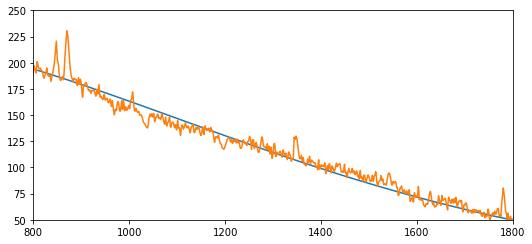

In [112]:
plt.xlim((800, 1800))
plt.ylim((50, 250))
plt.plot(imodpoly(df_original.iloc[0], poly_order=5, tol=0.005, max_iter=100, weights=None, use_original=False, mask_initial_peaks=True, return_coef=False, num_std=1)[0])
plt.plot(df_original.iloc[0].to_numpy())
plt.show()

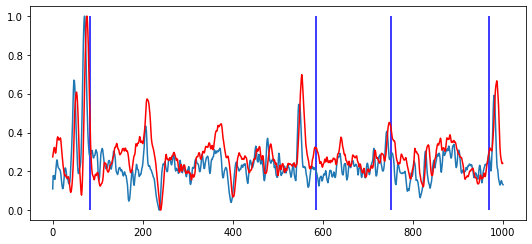

In [111]:
subj = raw_raman
rolling = subj.rolling(window=11)
rolling_mean = rolling.mean()

df_transformed_pybaseline = scaler.fit_transform(rolling_mean[800:1800].to_numpy().reshape(-1, 1))
df_transformed_pybaseline = min_max_scaler.fit_transform(df_transformed_pybaseline)

# subj = pd.Series(df_transformed_pybaseline.reshape(-1))
# rolling = subj.rolling(window=11)
# rolling_mean = rolling.mean()
# rolling_mean

# subj.plot()
plt.vlines(83, 0, 1, linestyles ="solid", colors ="blue")
plt.vlines(585, 0, 1, linestyles ="solid", colors ="blue")
plt.vlines(752, 0, 1, linestyles ="solid", colors ="blue")
plt.vlines(968, 0, 1, linestyles ="solid", colors ="blue")


plt.plot(df_matlab.iloc[0])
plt.plot(df_transformed_pybaseline, color='red')
plt.show()

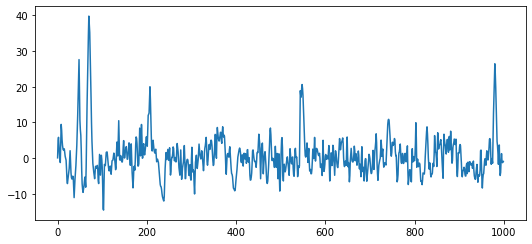

In [197]:
plt.plot(raw_raman.to_numpy()[800:1800])
plt.show()

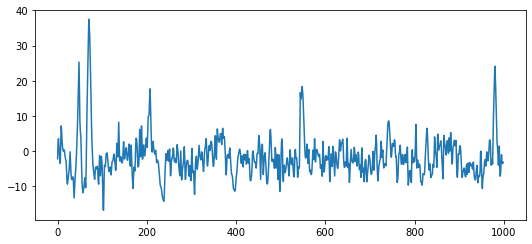

In [200]:
plt.plot(scaler.fit_transform(raw_raman.to_numpy().reshape(-1, 1))[800:1800])
plt.show()

In [16]:
X = crop_range_to_numpy(df_original)
y = df_original['has_DM2'].drop(0, inplace=False)

In [17]:
X

array([[191.1858643 , 195.9431122 , 197.0198853 , ...,  50.59999924,
         50.60299988,  50.72526779],
       [175.0245117 , 183.2823822 , 189.8434601 , ...,  55.34558183,
         53.15800324,  51.44623718],
       [120.8148666 , 122.1612594 , 124.7353927 , ...,  35.55124016,
         40.04401169,  33.68602638],
       ...,
       [ 78.01160145,  82.83617497,  85.59704685, ...,  13.90607262,
         22.12063456,  16.84778631],
       [254.6158447 , 260.07621   , 262.4306437 , ...,  62.12131691,
         60.30583445,  59.18503761],
       [274.515239  , 278.913446  , 283.1242096 , ...,  68.75759659,
         68.33700486,  65.76935577]])